# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [5]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU
from keras import models
from keras.applications import ResNet50

## Pre-Processing

### Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 30,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [7]:
model = Sequential()


conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model.add(conv_base)
model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))
for layer in conv_base.layers:
  layer.trainable = False


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\CostaPC2\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 56s 1us/step


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               401604    
Total params: 23,989,316
Trainable params: 401,604
Non-trainable params: 23,587,712
_________________________________________________________________


### Train

In [9]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch44.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
182/182 [==============================] - 146s 800ms/step - loss: 4.9006 - acc: 0.0646 - val_loss: 4.3712 - val_acc: 0.0801

Epoch 00001: val_loss improved from inf to 4.37120, saving model to Saved_Models/weights.best.from_scratch44.hdf5
Epoch 2/100
182/182 [==============================] - 138s 759ms/step - loss: 3.3930 - acc: 0.2538 - val_loss: 3.5601 - val_acc: 0.1925

Epoch 00002: val_loss improved from 4.37120 to 3.56012, saving model to Saved_Models/weights.best.from_scratch44.hdf5
Epoch 3/100
182/182 [==============================] - 135s 742ms/step - loss: 2.6626 - acc: 0.3884 - val_loss: 3.1997 - val_acc: 0.2739

Epoch 00003: val_loss improved from 3.56012 to 3.19968, saving model to Saved_Models/weights.best.from_scratch44.hdf5
Epoch 4/100
182/182 [==============================] - 135s 744ms/step - loss: 2.1503 - acc: 0.4900 - val_loss: 2.9927 - val_acc: 0.3241

Epoch 00004: val_loss improved from 3.19968 to 2.9


Epoch 00037: val_loss did not improve from 2.38762
Epoch 38/100
182/182 [==============================] - 133s 728ms/step - loss: 0.3110 - acc: 0.9073 - val_loss: 2.4710 - val_acc: 0.5060

Epoch 00038: val_loss did not improve from 2.38762
Epoch 39/100
182/182 [==============================] - 132s 727ms/step - loss: 0.3022 - acc: 0.9083 - val_loss: 2.4605 - val_acc: 0.5089

Epoch 00039: val_loss did not improve from 2.38762
Epoch 40/100
182/182 [==============================] - 132s 727ms/step - loss: 0.2962 - acc: 0.9128 - val_loss: 2.5422 - val_acc: 0.4966

Epoch 00040: val_loss did not improve from 2.38762
Epoch 41/100
182/182 [==============================] - 133s 729ms/step - loss: 0.2709 - acc: 0.9222 - val_loss: 2.5507 - val_acc: 0.4957

Epoch 00041: val_loss did not improve from 2.38762
Epoch 42/100
182/182 [==============================] - 133s 729ms/step - loss: 0.2776 - acc: 0.9150 - val_loss: 2.4828 - val_acc: 0.5149

Epoch 00042: val_loss did not improve from 2.3876

182/182 [==============================] - 133s 730ms/step - loss: 0.1663 - acc: 0.9495 - val_loss: 2.6903 - val_acc: 0.5285

Epoch 00081: val_loss did not improve from 2.38762
Epoch 82/100
182/182 [==============================] - 133s 729ms/step - loss: 0.1517 - acc: 0.9536 - val_loss: 2.7436 - val_acc: 0.5183

Epoch 00082: val_loss did not improve from 2.38762
Epoch 83/100
182/182 [==============================] - 133s 729ms/step - loss: 0.1618 - acc: 0.9538 - val_loss: 2.7292 - val_acc: 0.5400

Epoch 00083: val_loss did not improve from 2.38762
Epoch 84/100
182/182 [==============================] - 133s 729ms/step - loss: 0.1525 - acc: 0.9524 - val_loss: 2.7595 - val_acc: 0.5226

Epoch 00084: val_loss did not improve from 2.38762
Epoch 85/100
182/182 [==============================] - 132s 728ms/step - loss: 0.1587 - acc: 0.9509 - val_loss: 2.6525 - val_acc: 0.5405

Epoch 00085: val_loss did not improve from 2.38762
Epoch 86/100
182/182 [==============================] - 133s 73

In [10]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,4.371201,0.080068,4.905920,0.063665
1,1,3.560116,0.192504,3.396690,0.253796
2,2,3.199675,0.273850,2.663324,0.390269
3,3,2.992695,0.324106,2.147663,0.489993
4,4,2.810788,0.351363,1.869625,0.547619
5,5,2.728249,0.377342,1.599338,0.604037
6,6,2.686870,0.406303,1.424059,0.638544
7,7,2.564174,0.425043,1.272769,0.677536
8,8,2.547055,0.426320,1.157671,0.708937
9,9,2.506070,0.433986,1.051630,0.720152


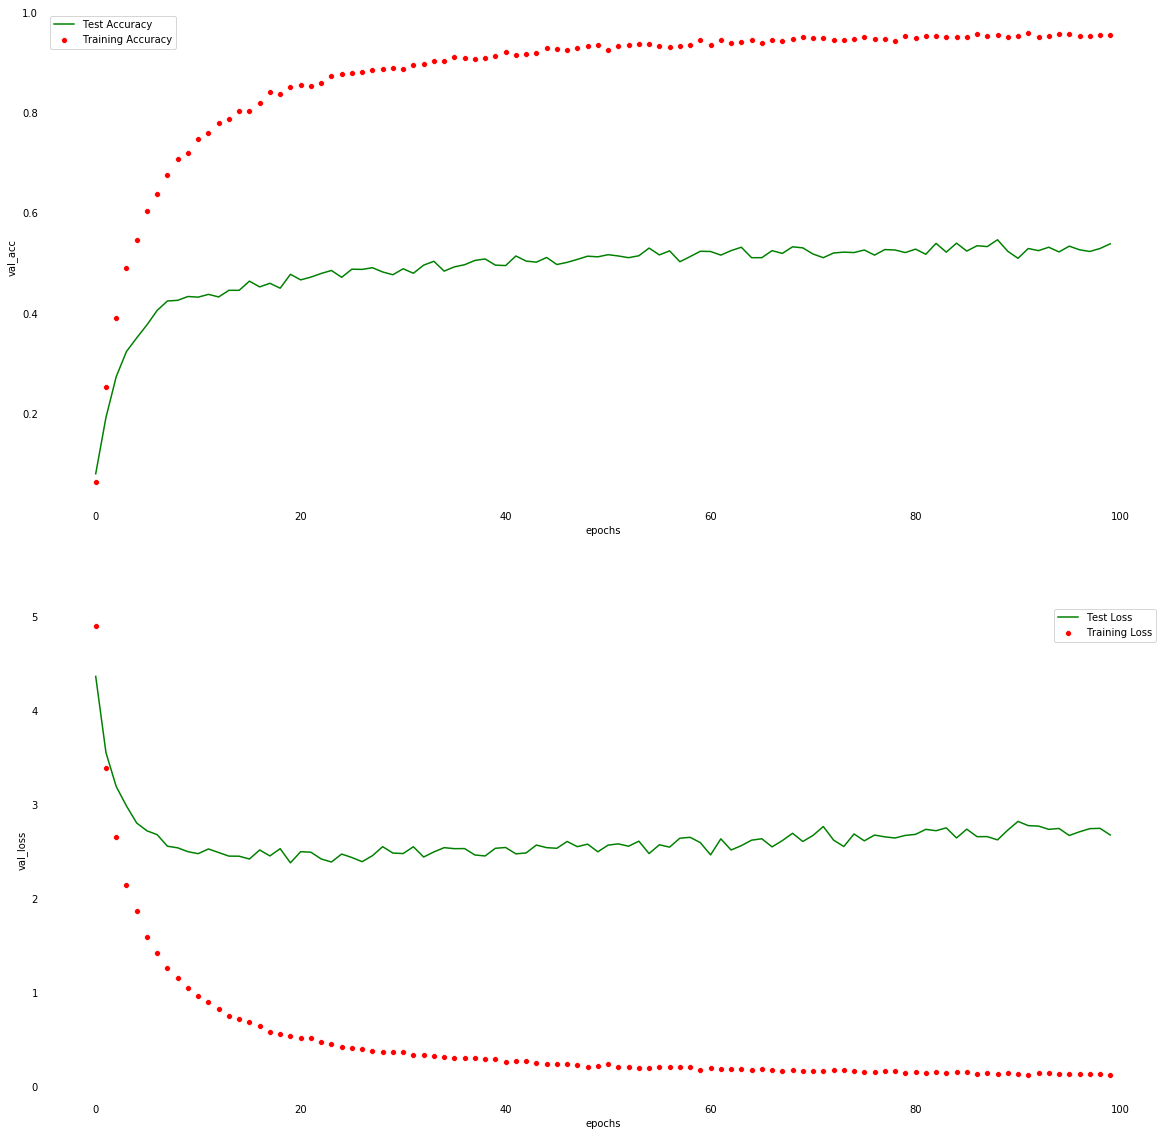

In [11]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters